<a href="https://colab.research.google.com/github/sebct0402/Talleres_maestria_ciencia_de_datos/blob/main/2_SESION4_base_taller_futbol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TALLER DE APLICACIÓN 1: Caso Scouting

Usted hace parte del equipo de analítica de datos del Sunderland AFC de la segunda división
inglesa. Se les ha encomendado trabajar en un proyecto sobre reclutar jugadores (scouting).
Para ello, cuenta con una base de datos del videojuego FIFA que cuenta con información real
de 22,080 jugadores a nivel mundial, recolectada en febrero de 2023. Esta información es
confiable dado que dicha empresa cuenta con más de 6 mil scouts alrededor del mundo
quienes realizan permanentes evaluaciones sobre el desempeño de los jugadores.
Su jefe le ha pedido una descripción de la base de datos, para conocer mejor cómo pueden
trabajar con ella. La base de datos cuenta con una pestaña donde está el diccionario de
variables. Tenga en cuenta esta información para poder entender los datos.
Principalmente, se busca que usted de respuesta a los siguientes interrogantes.
1. ¿Qué tipo de variable es cada una de las columnas? (recuerde responder según las 4
clasificaciones vistas en clase).
2. Realice un completo análisis descriptivo de las columnas que vamos a utilizar:
a) Age
b) height_cm
c) position
d) club_country
e) overall
f) club_overall
g) value_millions
h) pref_foot
3. Un miembro del cuerpo técnico asegura que los arqueros (GK) altos tienen un mejor
desempeño (overall). ¿Qué puede afirmar usted a través de un análisis descriptivo?
(Nota: tome por definición tres grupos de estatura: i) menor a 185 cm; ii) entre 185 y
192 cm; iii) más de 192 cm)
4. Un analista afirma que los jugadores zurdos, tienen un mejor desempeño (overall) que
los diestros. ¿Qué puede decir sobre esta afirmación a través de un análisis
descriptivo?
5. Un scout asegura que los mejores jugadores, según el puntaje de desempeño (overall),
juegan en clubes que pertenecen al grupo de “ligas top5” (Inglaterra, España,
Alemania, Italia y Francia). ¿Qué puede decir sobre estas dos afirmaciones a través de
un análisis descriptivo?
6. Otro scout asegura que la proporción de jugadores zurdos es mayor en la posición de
centro campista (CM) que en la de centro campista ofensivo (CAM). ¿Qué puede decir
sobre esta afirmación?
7. Otro scout asegura que los mejores jugadores juegan en los mejores clubes del mundo
¿Es cierta esta afirmación de que existe una correlación entre el desempeño de los
jugadores (overall) y el puntaje de desempeño del club al que pertenece (club_overall)?

A continuación un breve diccionario de las diferentes variables en el dataset.

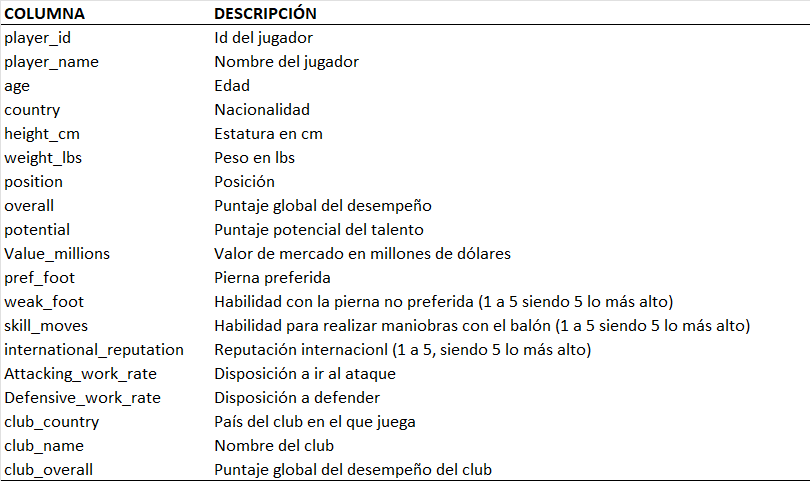

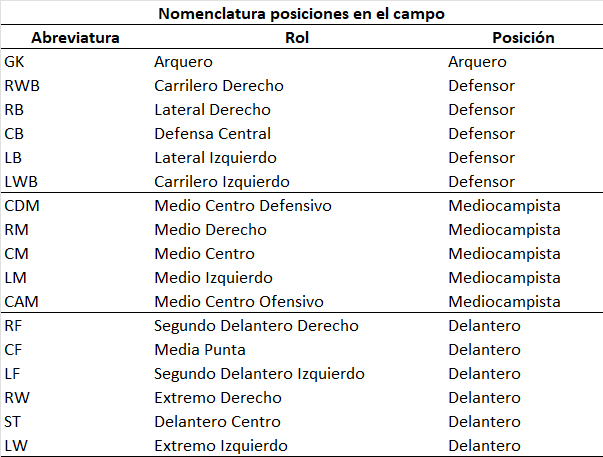

###Exploración de datos para preguntas planteadas

In [ ]:
#Importamos algunas librerías de interés y montamos drive para acceder al archivo
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/COLABS MCD/2-base_taller_csv.csv', sep=';')  #Leer CSV separado por ","

In [ ]:
df

,player_id,player_name,age,country,height_cm,weight_lbs,position,overall,potential,Value_millions,pref_foot,weak_foot,skill_moves,international_reputation,Attacking_work_rate,Defensive_work_rate,body_type,club_country,club_name,club_overall
0,231747,Kylian Mbappé Lottin,23,France,182,161,ST,91,95,"190,5",Right,4,5,4,High,Low,Unique,France,Paris Saint Germain,84
1,192985,Kevin De Bruyne,31,Belgium,181,165,CM,91,91,"107,5",Right,5,4,4,High,Medium,Unique,England,Manchester City,85
2,188545,Robert Lewandowski,33,Poland,185,179,ST,91,91,84,Right,4,4,5,High,Medium,Unique,Spain,Fc Barcelona,83
3,165153,Karim Benzema,34,France,185,179,CF,91,91,64,Right,4,4,4,Medium,Medium,Normal (170-185),Spain,Real Madrid,85
4,158023,Lionel Andrés Messi Cuccittini,35,Argentina,169,148,RW,91,91,54,Left,4,4,5,Low,Low,Unique,France,Paris Saint Germain,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22075,261876,Conan Noonan,19,Republic of Ireland,180,148,ST,52,63,"0,17",Right,3,2,1,Medium,Medium,Lean (170-185),Republic of Ireland,Shamrock Rovers,63
22076,254232,Mohammed Asif Khan,21,India,171,121,CAM,46,58,"0,12",Right,2,2,1,Low,Medium,Lean (170-185),India,Mumbai City,62
22077,259213,Antonio D'Silva,22,India,182,161,GK,51,61,"0,11",Right,3,1,1,Medium,Medium,Normal (170-185),India,Odisha Fc,58
22078,258802,Bhupender Singh,22,India,172,157,RM,46,54,"0,11",Right,2,2,1,Medium,Medium,Lean (170-185),India,Jamshedpur,58


####Tipos de variable en cada columna:

In [ ]:
print(df.isnull().any(axis=1).sum())    #Verificación inicial de valores nulos en el dataset

0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22080 entries, 0 to 22079
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   player_id                 22080 non-null  int64 
 1   player_name               22080 non-null  object
 2   age                       22080 non-null  int64 
 3   country                   22080 non-null  object
 4   height_cm                 22080 non-null  int64 
 5   weight_lbs                22080 non-null  int64 
 6   position                  22080 non-null  object
 7   overall                   22080 non-null  int64 
 8   potential                 22080 non-null  int64 
 9   Value_millions            22080 non-null  object
 10  pref_foot                 22080 non-null  object
 11  weak_foot                 22080 non-null  int64 
 12  skill_moves               22080 non-null  int64 
 13  international_reputation  22080 non-null  int64 
 14  Attacking_work_rate   

Encontramos 10 variables object y 10 variables enteras, sin embargo value_millions debería tratarse de una variable de tipo float.

In [ ]:
df['Value_millions'] = df['Value_millions'].str.replace(',', '.').astype(float)

In [ ]:
print(df.dtypes.value_counts())

int64      10
object      9
float64     1
Name: count, dtype: int64


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22080 entries, 0 to 22079
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   player_id                 22080 non-null  int64  
 1   player_name               22080 non-null  object 
 2   age                       22080 non-null  int64  
 3   country                   22080 non-null  object 
 4   height_cm                 22080 non-null  int64  
 5   weight_lbs                22080 non-null  int64  
 6   position                  22080 non-null  object 
 7   overall                   22080 non-null  int64  
 8   potential                 22080 non-null  int64  
 9   Value_millions            22080 non-null  float64
 10  pref_foot                 22080 non-null  object 
 11  weak_foot                 22080 non-null  int64  
 12  skill_moves               22080 non-null  int64  
 13  international_reputation  22080 non-null  int64  
 14  Attack

**R1/** En el conjunto de datos encontramos 9 variables de tipo string, 10 variables numéricas enteras y 1 variable de tipo numérica flotante. Para revisar la correspondencia de tipo de variable revisar el código anterior.

Cabe resaltar que dentro del dataset ninguna columna presenta valores faltantes.

####Análisis descriptivo de las columnas numéricas:

In [ ]:
df.describe()

,player_id,age,height_cm,weight_lbs,overall,potential,Value_millions,weak_foot,skill_moves,international_reputation,club_overall
count,22080.000000,22080.000000,22080.000000,22080.000000,22080.000000,22080.000000,22080.000000,22080.000000,22080.000000,22080.000000,22080.000000
mean,238806.667618,24.894112,181.391893,165.399457,65.223958,70.458107,2.501067,2.932699,2.362726,1.075272,68.295743
std,28565.188684,4.891117,6.852274,15.411979,6.804443,6.147813,6.869693,0.673396,0.764252,0.334532,5.358555
min,1179.000000,16.000000,155.000000,108.000000,46.000000,46.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,222433.250000,21.000000,176.000000,154.000000,61.000000,66.000000,0.450000,3.000000,2.000000,1.000000,65.000000
50%,243590.000000,24.000000,181.000000,165.000000,65.000000,70.000000,0.900000,3.000000,2.000000,1.000000,68.000000
75%,262079.500000,28.000000,186.000000,176.000000,70.000000,74.000000,1.800000,3.000000,3.000000,1.000000,71.000000
max,275460.000000,44.000000,206.000000,231.000000,91.000000,95.000000,190.500000,5.000000,5.000000,5.000000,85.000000


array([[<Axes: title={'center': 'player_id'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height_cm'}>],
       [<Axes: title={'center': 'weight_lbs'}>,
        <Axes: title={'center': 'overall'}>,
        <Axes: title={'center': 'potential'}>],
       [<Axes: title={'center': 'Value_millions'}>,
        <Axes: title={'center': 'weak_foot'}>,
        <Axes: title={'center': 'skill_moves'}>],
       [<Axes: title={'center': 'international_reputation'}>,
        <Axes: title={'center': 'club_overall'}>, <Axes: >]], dtype=object)

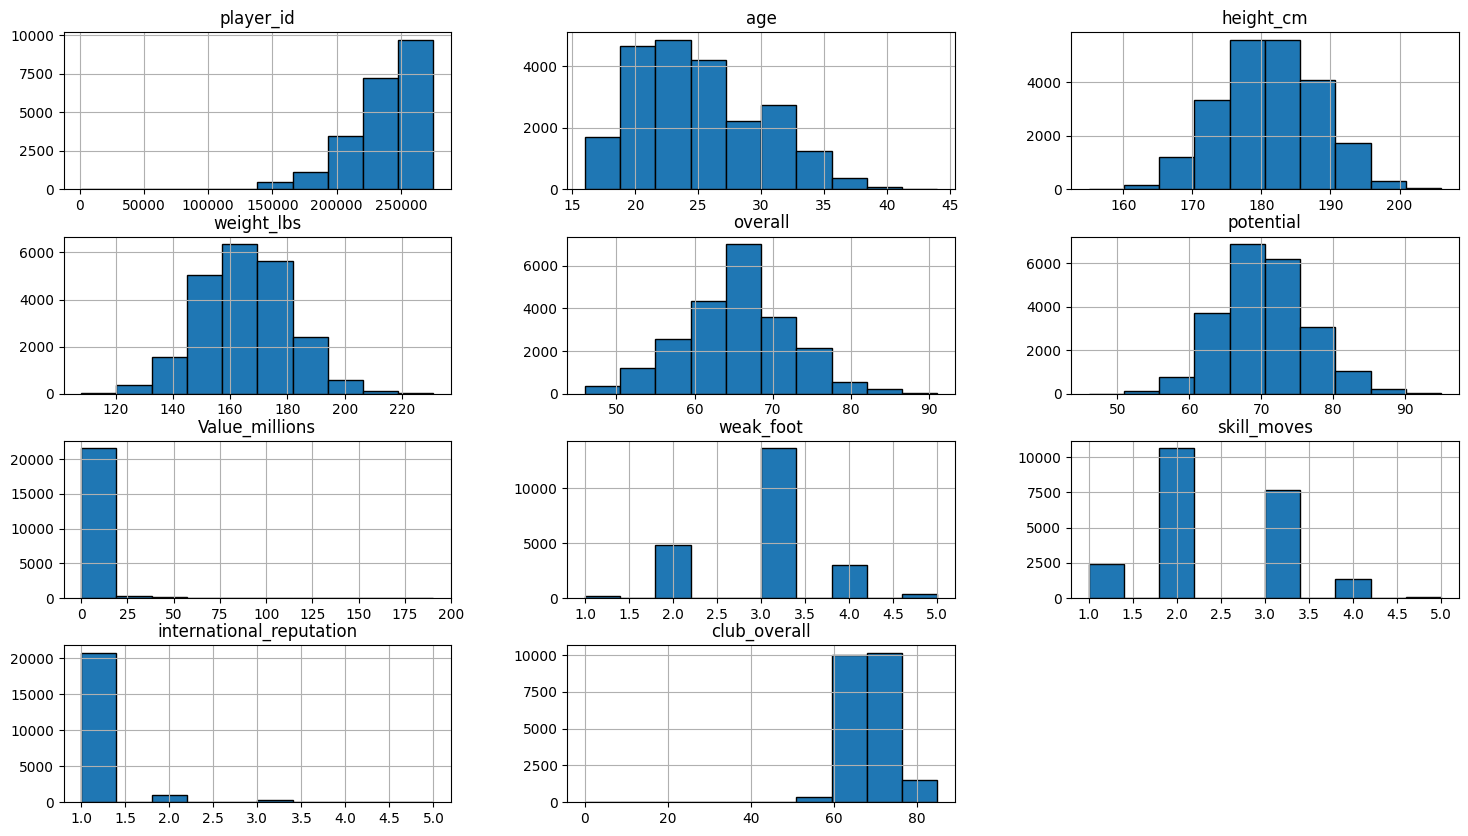

In [ ]:
df.hist(bins=10, figsize=(18, 10), edgecolor='black')

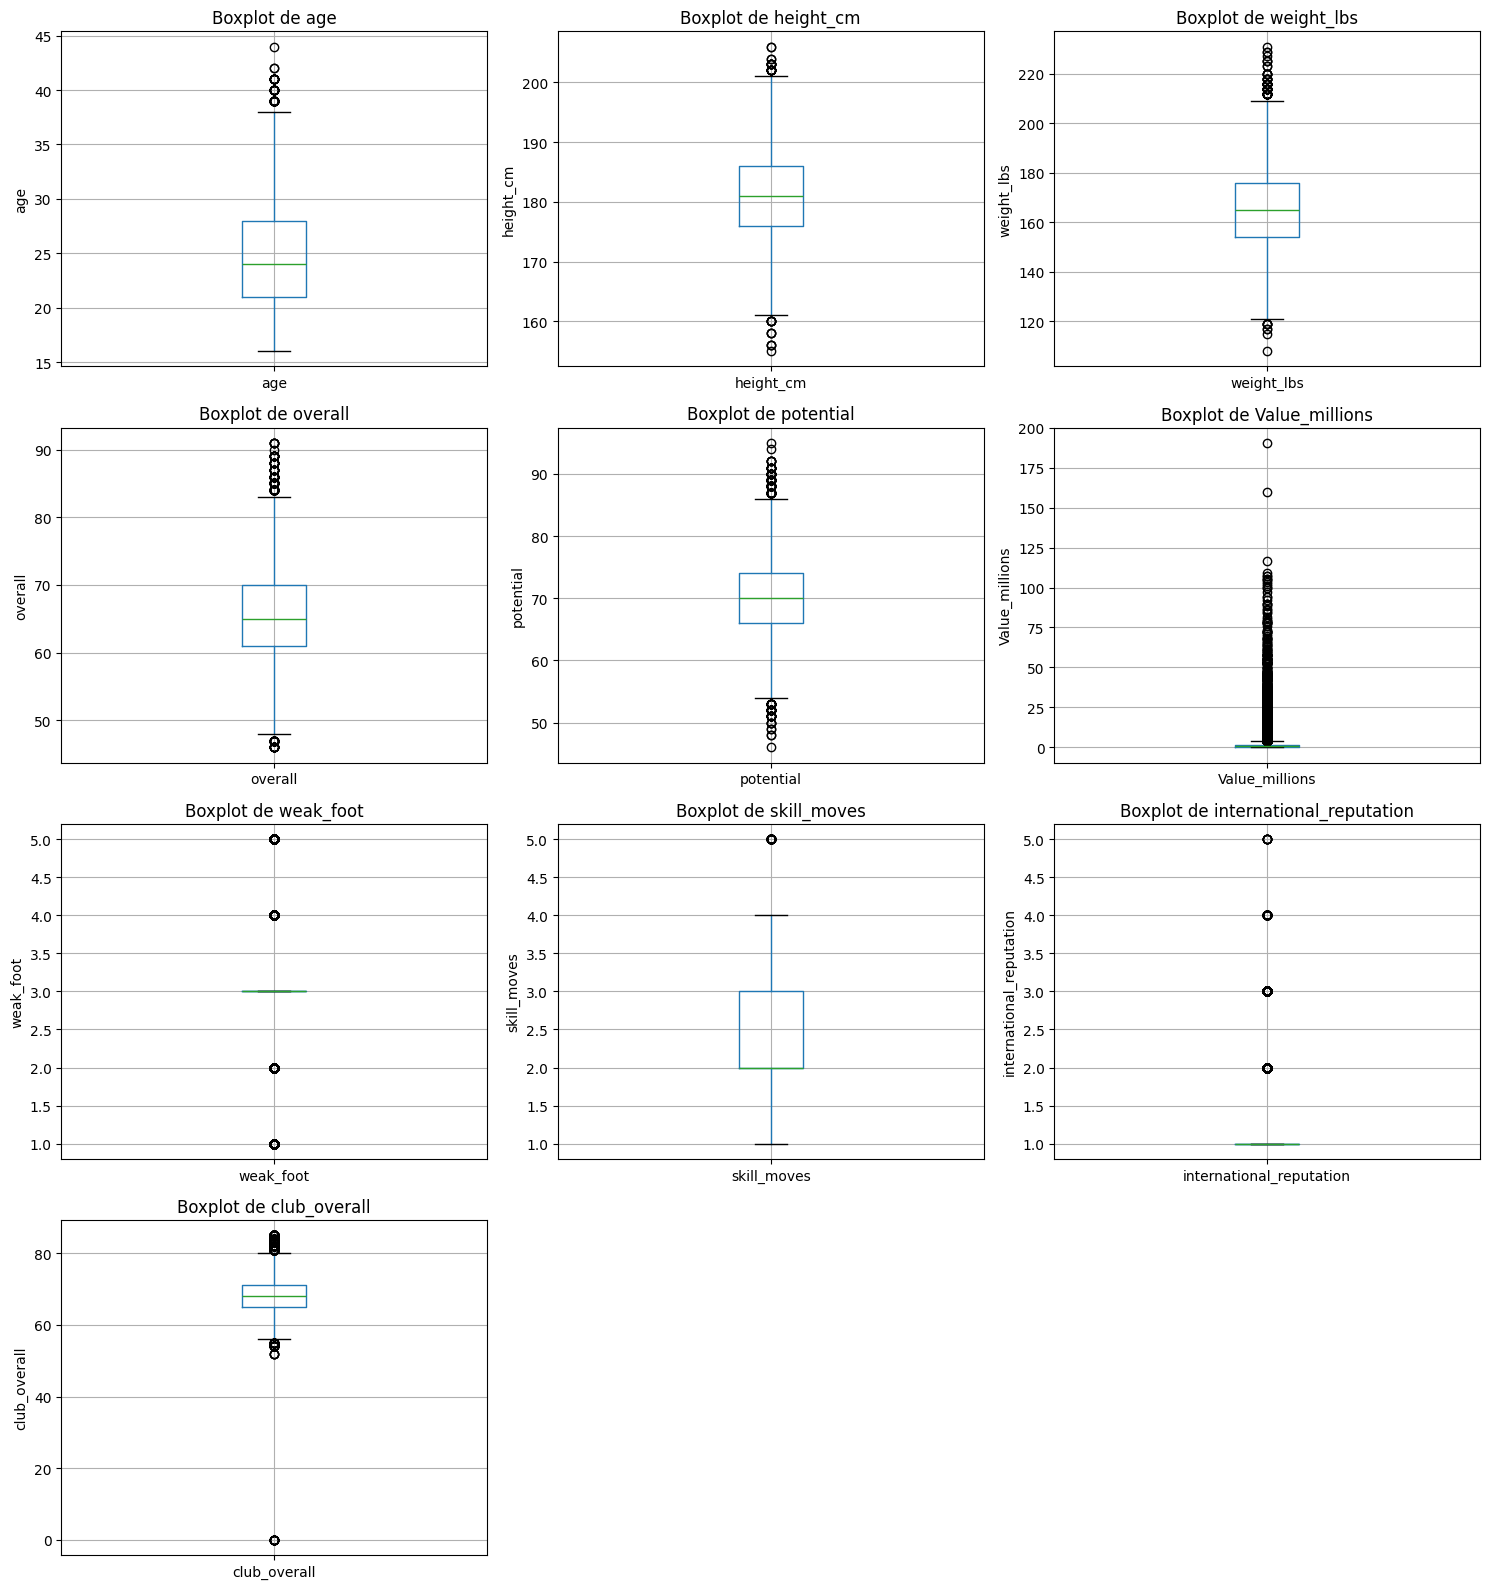

In [ ]:
import math

# Variables numéricas (sin 'player_id')
numericas = df.drop(columns=['player_id']).select_dtypes(include=['number']).columns

# Número de variables
n = len(numericas)

# Definir filas y columnas para la cuadrícula
cols = 3  # Número de columnas (puedes ajustarlo)
rows = math.ceil(n / cols)

# Crear figura y ejes
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  # Convertir a lista para iterar fácilmente

# Crear boxplots
for i, col in enumerate(numericas):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_ylabel(col)

# Eliminar ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
df.select_dtypes(include='object').describe() #Verifiquemos brevemente las variables de tipo object

,player_name,country,position,pref_foot,Attacking_work_rate,Defensive_work_rate,body_type,club_country,club_name
count,22080,22080,22080,22080,22080,22080,22080,22080,22080
unique,22045,164,15,2,3,3,10,54,732
top,Sang Min Lee,England,CB,Right,Medium,Medium,Normal (170-185),England,Liverpool
freq,3,1812,3876,16733,14761,16169,7629,2741,69


Ahora revisemos nuestras variables de tipo object para el análisis

In [ ]:
print(f'''Valores únicos de cada variable a analizar:

Para variable posición: {df["position"].unique()}

Para variable país del club: {df["club_country"].unique()}

Para variable pie preferido: {df["pref_foot"].unique()}''')

Valores únicos de cada variable a analizar:

Para variable posición: ['ST' 'CM' 'CF' 'RW' 'GK' 'CDM' 'LW' 'CB' 'CAM' 'LB' 'RB' 'RM' 'RWB' 'LM'
 'LWB']

Para variable país del club: ['France' 'England' 'Spain' 'Germany' 'Italy' 'Portugal' 'Hungary'
 'Monaco' 'Turkey' 'Brazil' 'Croatia' 'Netherlands' 'Saudi Arabia'
 'Canada' 'Belgium' 'United States' 'Austria' 'Ukraine' 'Argentina'
 'Sweden' 'Denmark' 'Mexico' 'Czech Republic' 'Romania' 'China PR'
 'Uruguay' 'Colombia' 'Australia' 'Scotland' 'Switzerland'
 'United Arab Emirates' 'Greece' 'Poland' 'Qatar' 'Chile' 'Ecuador'
 'Korea Republic' 'Morocco' 'Peru' 'Paraguay' 'Republic of Ireland'
 'Norway' 'Wales' 'Finland' 'Bolivia' 'South Africa' 'Iceland' 'Cyprus'
 'Venezuela' 'Ghana' 'Northern Ireland' 'India' 'New Zealand' 'No club']

Para variable pie preferido: ['Right' 'Left']


Miremos la cantidad de valores por datos únicios

In [ ]:
print(df['position'].value_counts(), '\n')
print(df["club_country"].value_counts(), '\n')
print(df["pref_foot"].value_counts(), '\n')

position
CB     3876
ST     3113
CM     2590
GK     2430
CDM    1829
RB     1416
LB     1379
CAM    1267
RM     1145
LM     1143
RW      548
LW      506
LWB     353
RWB     345
CF      140
Name: count, dtype: int64 

club_country
England                 2741
Germany                 1700
Spain                   1355
Italy                   1178
France                  1167
Argentina                949
United States            832
China PR                 600
Portugal                 576
Turkey                   570
Poland                   562
Netherlands              555
Romania                  528
Belgium                  527
Sweden                   509
Saudi Arabia             501
Norway                   490
Korea Republic           419
Ecuador                  372
Austria                  366
Denmark                  358
Colombia                 350
Bolivia                  347
Scotland                 346
Brazil                   340
Paraguay                 338
Chile           

Convirtamoslo a porcentajes

In [ ]:
print(df['position'].value_counts(normalize=True)*100, '\n')
print(df["club_country"].value_counts(normalize=True)*100, '\n')
print(df["pref_foot"].value_counts(normalize=True)*100, '\n')

position
CB     17.554348
ST     14.098732
CM     11.730072
GK     11.005435
CDM     8.283514
RB      6.413043
LB      6.245471
CAM     5.738225
RM      5.185688
LM      5.176630
RW      2.481884
LW      2.291667
LWB     1.598732
RWB     1.562500
CF      0.634058
Name: proportion, dtype: float64 

club_country
England                 12.413949
Germany                  7.699275
Spain                    6.136775
Italy                    5.335145
France                   5.285326
Argentina                4.298007
United States            3.768116
China PR                 2.717391
Portugal                 2.608696
Turkey                   2.581522
Poland                   2.545290
Netherlands              2.513587
Romania                  2.391304
Belgium                  2.386775
Sweden                   2.305254
Saudi Arabia             2.269022
Norway                   2.219203
Korea Republic           1.897645
Ecuador                  1.684783
Austria                  1.657609
Denmark 

In [ ]:
mayor_10mill = df[df['Value_millions']>10].any(axis=1).count()
print('Cantidad de jugadores que valen más de 10 millones:',mayor_10mill)

Cantidad de jugadores que valen más de 10 millones: 1033


In [ ]:
print('Cantidad total de jugadores:', len(df))

Cantidad total de jugadores: 22080


In [ ]:
print('Porcentaje de jugadores con valor mayor a 10 millones:', (mayor_10mill/len(df)*100),'%')

Porcentaje de jugadores con valor mayor a 10 millones: 4.678442028985507 %


In [ ]:
df.pref_foot.value_counts()

,count
pref_foot,
Right,16733
Left,5347


In [ ]:
df.pref_foot.value_counts(normalize=True)*100

,proportion
pref_foot,
Right,75.783514
Left,24.216486


Hagamos ahora un breve análisis por las variables a usar:
a) Age
b) height_cm
c) position
d) club_country
e) overall
f) club_overall
g) value_millions
h) pref_foot.

A nivel general, podemos comentar que no hay valores faltantes por lo que todas las columnas cuentan con 22080 registros.

- Age: Encontramos que la mayoría de los datos se encuentran por debajo de los 28 años. El dato máximo encontrado es de 44 años y el mínimo 16. los datos siguen una distribución normal sesgada a la derecha.
- height_cm: Encontramos una altura media de 181 cm de altura con una gran mayoría entre 170 y 190 cm. La variable sigue una distribución normal.
- position: Encontramos 15 distintas posiciones, donde la más frecuente es Defensa Central (CB). También encontramos menor frecuencia en Media Punta (CF).
-club_country: Encontramos clubes en 54 paises con Francia e Italia siendo los paises con más jugadores en sus clubes (dentro del dataframe). Por el contrario, Ghana es el país con menos apariciones respecto a jugadores en sus clubes.
- Overall: Puntaje con registros entre 46 y 91 distribuido normalmente y con media de 65.
- Club overall: Puntaje con escala del 1 al 5 que sigue una distribución normal.
- Value_millions: Se encuentra una gran desigualdad y diferencia entre los jugadores del dataset: mientras que el 50% entre el primer y tercer cuartil recibe una valoración entre 0.45 y 1.8 millones, Existe un 4.67% que gana más de 10 millones; siendo el mayor valor de 190.5 millones.
- Prefer_foot: Encontramos que la variable es binaria, donde el 76% son de pie diestro y el 24% de pie zurdo.

####**Análisis de altura en desempeño:**

Veamos la correlación entre altura y desempeño

In [ ]:
df_arch = df[df['position'] == 'GK']
df_arch = df_arch[['height_cm', 'overall']]
df_arch[['height_cm', 'overall']].corr()

,height_cm,overall
height_cm,1.000000,0.138806
overall,0.138806,1.000000


<Axes: xlabel='height_cm', ylabel='overall'>

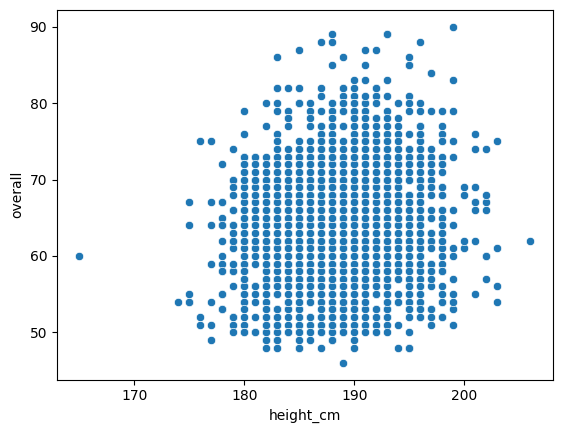

In [ ]:
sns.scatterplot(data=df_arch, x='height_cm', y='overall')

Ahora tomemos en cuenta los grupos de altura dados en la consigna

In [ ]:
##Creación de grupos por altura:
df_arch['height_group'] = df_arch['height_cm'].apply(lambda x: 'short' if x < 185 else ('medium' if x < 192 else 'tall'))

In [ ]:
df_arch

,height_cm,overall,height_group
6,199,90,tall
7,193,89,tall
11,188,89,medium
14,193,89,tall
16,196,88,tall
...,...,...,...
22057,186,49,medium
22059,185,50,medium
22064,185,48,medium
22065,187,50,medium


medias de los grupos:

In [ ]:
df_arch.groupby('height_group').mean()

,height_cm,overall
height_group,,
medium,187.994811,64.053373
short,181.698630,62.086758
tall,194.547434,64.811820


Correlación con desempeño de los grupos

In [ ]:
pd.get_dummies(df_arch, columns=['height_group']).corr()['overall']

,overall
height_cm,0.138806
overall,1.000000
height_group_medium,0.023066
height_group_short,-0.114133
height_group_tall,0.073470


Encontramos una correlación levemente significativa entre la altura de un arquero y su desempeño. Específicamente se encuntra que pertenecer al grupo de baja estatura (menos de 185cm) se tiene un desempeño ligeramente menor; mientras entre los grupos de media y alta estatura (entre [185,192] y más de 192 cm respectivamente) no hubo diferencias significativas en el desempeño.

R/ Si es correcto afirmar que los arqueros altos tienen mejor desempeño cuando se comparan con los arqueros clasificados como bajos; sin embargo, el desempeño es equivalente al comparar arqueros de altura media.

**Análisis de pierna dominante en el desempeño:**

In [ ]:
df_leg = df[['pref_foot', 'overall']]
df_leg['pref_foot'].unique()

array(['Right', 'Left'], dtype=object)

Media de desempeño dependiendo de la pierna dominante:

In [ ]:
df_leg.groupby('pref_foot').mean()

,overall
pref_foot,
Left,65.766037
Right,65.050738


Veamos la correlación:

In [ ]:
df_leg['pref_foot_numeric'] = df['pref_foot'].map({'Right': 1, 'Left': 0})
df_leg[['pref_foot_numeric','overall']].corr()

/tmp/ipython-input-598588784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_leg['pref_foot_numeric'] = df['pref_foot'].map({'Right': 1, 'Left': 0})


,pref_foot_numeric,overall
pref_foot_numeric,1.000000,-0.045035
overall,-0.045035,1.000000


R/ No se encuentran diferencias significativas al verificar el desempeño respecto a la pierna dominante; por lo que es incorrecto decir que los jugadores zurdos tienen mejor desempeño.

**Revisión Top 5 ligas y desempeño:**

In [ ]:
Top_5_ligas = ['England', 'Spain', 'Germany', 'Italy', 'France']
df_liga = df[['club_country', 'overall']]
df_liga["Top 5 league"] = df_liga.apply(lambda x: 1 if x["club_country"] in Top_5_ligas else 0, axis=1)
df_liga[["Top 5 league", 'overall']].corr()

/tmp/ipython-input-661707597.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_liga["Top 5 league"] = df_liga.apply(lambda x: 1 if x["club_country"] in Top_5_ligas else 0, axis=1)


,Top 5 league,overall
Top 5 league,1.00000,0.18197
overall,0.18197,1.00000


Encontramos una correlación débil entre las variables, por lo tanto tiene sentido afirmar que pertenecer a los clubes del top 5 está relacionado con un mejor desempeño.

Ahora establezcamos una regla para referirnos a los mejores jugadores para este análisis: Los mejores jugadores serán el percentil 95.

In [ ]:
umbral = df["overall"].quantile(0.95)  # top 5%
df_top_players = df[df["overall"] >= umbral]
df_top_players.groupby('club_country').size()

,0
club_country,
Argentina,27
Australia,2
Austria,3
Belgium,18
Brazil,55
Canada,4
Chile,4
China PR,6
Colombia,2


Obtengamos el porcentaje de los jugadores del top 5% que están en los clubes de interés

In [ ]:
mejores_top5 = df_top_players[df_top_players["club_country"].isin(Top_5_ligas)]
proporcion = len(mejores_top5) / len(df_top_players)
print("Proporción de mejores jugadores en top 5 ligas:", proporcion)

Proporción de mejores jugadores en top 5 ligas: 0.7236936292054402


R/ Observando la información recién obtenida, encontramos que del percentil 95 de los jugadores (regla creada para definir a los mejores jugadores), 72,3% pertencen a uno de las Top 5 ligas. Teniendo en cuenta que existen un total de 54 ligas presentes en el dataset, podemos afirmar que los mejores jugadores tienden a pertenecer al grupo de "ligas top5".

####**Revisión de pie dominante y posición**

In [ ]:
df_foot_position = df[['pref_foot', 'position']].copy()

# Crear variables dummy
df_foot_position["Centro Campista"] = (df_foot_position['position'] == 'CM').astype(int)
df_foot_position["Centro Campista ofensivo"] = (df_foot_position['position'] == 'CAM').astype(int)
df_foot_position['pref_foot'] = df_foot_position['pref_foot'].map({'Right': 1, 'Left': 0})

#Elimina variable position e imprime
df_foot_position.drop('position', axis=1, inplace=True)
df_foot_position.head()


,pref_foot,Centro Campista,Centro Campista ofensivo
0,1,0,0
1,1,1,0
2,1,0,0
3,1,0,0
4,0,0,0


In [ ]:
print('Proporción de pie dominante en Centro campista')
df_foot_position['pref_foot'][(df_foot_position['Centro Campista'] == 1)].value_counts(normalize = True)*100

Proporción de pie dominante en Centro campista


,proportion
pref_foot,
1,81.428571
0,18.571429


In [ ]:
print('Proporción de pie dominante en Centro Campista ofensivo')
df_foot_position['pref_foot'][(df_foot_position['Centro Campista ofensivo'] == 1)].value_counts(normalize = True)*100

Proporción de pie dominante en Centro Campista ofensivo


,proportion
pref_foot,
1,72.138911
0,27.861089


R/ Podemos concluir que la proporción de jugadores zurdos es mayor en Centro Campistas ofensivos que en centro campistas. Por lo tanto, la afirmación del Scout es incorrecta.

**Análisis Pertenencia al club y desempeño:**

Para realizar esta pregunta llevaremos nuevamente la metodología de separar los mejores jugadores y mejores clubes de acuerdo a si pertenecen o no al percentil 95.

In [ ]:
df_club = df[['club_name', 'club_overall']]
df_club['club_name'].nunique()

732

Ahora hagamos tratamiento de los clubes con más de una calificaciónd de desempeño

In [ ]:
clubes_con_varios_overall = df.groupby("club_name")["club_overall"].nunique()
clubes_con_varios_overall = clubes_con_varios_overall[clubes_con_varios_overall > 1]

print(clubes_con_varios_overall)

club_name
9 De Octubre           2
Aab                    2
Aalesund               2
Aberdeen               2
Abha                   2
                      ..
Zhejiang               3
Ñublense               2
Ümraniyespor           2
İstanbul Başakşehir    2
İstanbulspor           2
Name: club_overall, Length: 337, dtype: int64


In [ ]:
df_club[(df_club['club_name'] == 'Zhejiang')]

,club_name,club_overall
3085,Zhejiang,62
3110,Zhejiang,64
3321,Zhejiang,64
4364,Zhejiang,62
4473,Zhejiang,62
9092,Zhejiang,62
12085,Zhejiang,62
14089,Zhejiang,62
14311,Zhejiang,62
14895,Zhejiang,62


Existen 337 clubes que cuentan con puntajes de desempeño distintos en sus jugadores. Para fines prácticos, se utilizará el puntaje más frecuente de cada club

In [ ]:
club_overall_unico = (
    df.groupby("club_name")["club_overall"]
      .agg(lambda x: x.mode().iloc[0])  # toma el más frecuente
      .reset_index()
)

print(club_overall_unico.head())

      club_name  club_overall
0  1860 München            66
1  9 De Octubre            64
2           Aab            67
3      Aalesund            63
4      Aberdeen            66


Veamos la estadística descriptiva de la variable club overall

In [ ]:
club_overall_unico['club_overall'].describe()

,club_overall
count,732.000000
mean,68.601093
std,5.812096
min,0.000000
25%,65.000000
50%,68.000000
75%,71.000000
max,85.000000


Empecemos a clafisificar el top 5% de clubes

In [ ]:
umbral = club_overall_unico["club_overall"].quantile(0.95)  # top 5%
df_top_clubs = club_overall_unico[club_overall_unico["club_overall"] >= umbral]
df_top_clubs.sort_values(by='club_overall', ascending=False)

,club_name,club_overall
400,Manchester City,85
269,Germany,85
234,Fc Bayern München,85
527,Real Madrid,85
485,Paris Saint Germain,84
385,Liverpool,84
49,Argentina,83
335,Inter,83
601,Spain,83
233,Fc Barcelona,83


Veamos la proporción de mejores jugadores en los mejores clubes

In [ ]:
len(df_top_players[(df_top_players['club_name'].isin(df_top_clubs['club_name']))]) / len(df_top_players)

0.4101646385110952

R/ De acuerdo con la información obtenida, el 41% de los mejores jugadores pertenecen a los mejores clubes (teniendo en cuenta la regla del percentil 95). Por lo tanto, si bien es uan proporción importante; no es suficiente para indicar que los mejores jugadores se encuentran en los mejores clubes del mundo.

<img src=https://audiovisuales.icesi.edu.co/assets/custom/images/ICESI_logo_prin_descriptor_RGB_POSITIVO_0924.jpg width=200>

*Milton Orlando Sarria Paja, PhD.*

----

### **Práctica: Predicción del Valor de Mercado de Jugadores de Fútbol**

**Objetivo General:** Utilizar técnicas de regresión lineal para construir modelos que predigan el valor de mercado de un jugador (`Value_millions`) basándose en sus atributos de rendimiento y características personales.

---

### **Ejercicio 1: Identificación de Variables y Análisis de Dependencia 🔍**

El primer paso en cualquier proyecto de modelado es entender profundamente los datos con los que trabajamos.

**Tareas:**

1.  **Identificar Variables Relevantes:**
    * Del listado de columnas, crea una lista de **todas las variables numéricas** que podrían ser útiles para predecir el valor de un jugador.
    * Excluye explícitamente las variables que son identificadores (como `player_id`) o categóricas puras (como `player_name`, `country`, `position`, `club_name`, etc.).

2.  **Análisis de Correlación:**
    * Una vez cargados los datos, calcula la matriz de correlación entre todas las variables numéricas que identificaste y la variable objetivo `Value_millions`.
    * Visualiza esta matriz utilizando un **mapa de calor (heatmap)**. Esto te dará una visión rápida de las relaciones lineales más fuertes.

3.  **Análisis Visual:**
    * Crea **gráficos de dispersión (scatter plots)** para visualizar la relación entre `Value_millions` y las 3-4 variables que mostraron la correlación más alta en el paso anterior.

**Preguntas para Reflexión y Discusión:**

* **Pregunta 1.1:** Según el mapa de calor, ¿cuáles son las tres variables con la correlación positiva más fuerte con `Value_millions`?
* **Pregunta 1.2:** Observa el gráfico de dispersión de `age` vs. `Value_millions`. ¿La relación parece ser una línea recta? Describe la forma que observas. (Esta observación será clave para el Ejercicio 5).
* **Pregunta 1.3:** ¿Qué variable, si alguna, parece tener una relación lineal casi perfecta con `Value_millions`? ¿Podría esto ser un problema o es algo esperado?

---

In [ ]:
df.head()

,player_id,player_name,age,country,height_cm,weight_lbs,position,overall,potential,Value_millions,pref_foot,weak_foot,skill_moves,international_reputation,Attacking_work_rate,Defensive_work_rate,body_type,club_country,club_name,club_overall
0,231747,Kylian Mbappé Lottin,23,France,182,161,ST,91,95,190.5,Right,4,5,4,High,Low,Unique,France,Paris Saint Germain,84
1,192985,Kevin De Bruyne,31,Belgium,181,165,CM,91,91,107.5,Right,5,4,4,High,Medium,Unique,England,Manchester City,85
2,188545,Robert Lewandowski,33,Poland,185,179,ST,91,91,84.0,Right,4,4,5,High,Medium,Unique,Spain,Fc Barcelona,83
3,165153,Karim Benzema,34,France,185,179,CF,91,91,64.0,Right,4,4,4,Medium,Medium,Normal (170-185),Spain,Real Madrid,85
4,158023,Lionel Andrés Messi Cuccittini,35,Argentina,169,148,RW,91,91,54.0,Left,4,4,5,Low,Low,Unique,France,Paris Saint Germain,84


Eliminemos variables no aprovechables en el análisis y visualicemos correlaciones respecto a la variable Target

In [ ]:
df.drop(['player_id','player_name','country','club_name','position'], axis = 1, inplace = True)

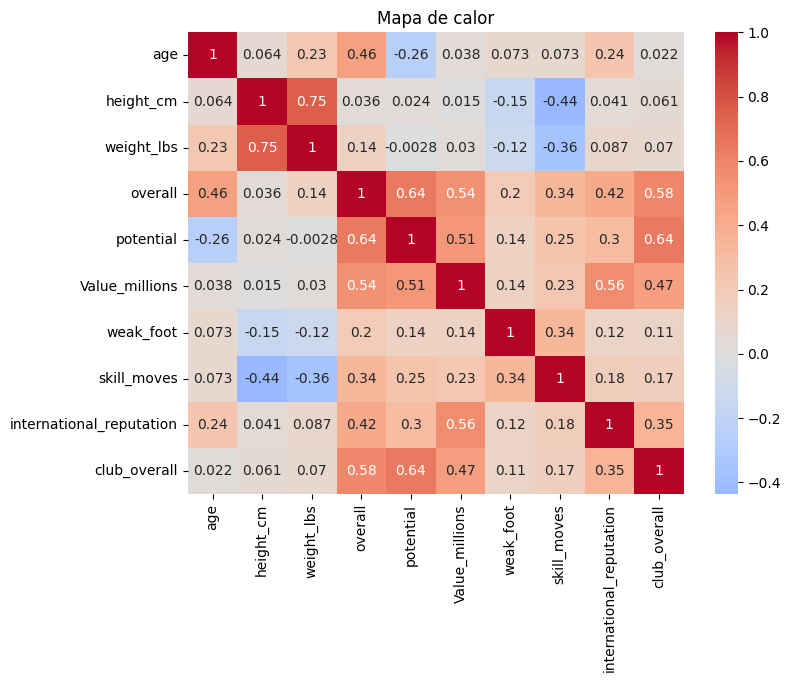

In [ ]:
# --- Calcular correlación ---
correlation = df.corr(numeric_only=True)  # matriz de correlaciones

# --- Graficar heatmap ---
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", center=0)
plt.title("Mapa de calor")
plt.show()

In [ ]:
correlation['Value_millions'].sort_values(ascending=False)

,Value_millions
Value_millions,1.000000
international_reputation,0.555256
overall,0.543204
potential,0.512392
club_overall,0.467281
skill_moves,0.230581
weak_foot,0.140975
age,0.038467
weight_lbs,0.029716
height_cm,0.014909


Ahora, para mejorar el análisis, utilicemos un enfoque One Hot Encoding para la variables categóricas y reiteremos sobre el mapa de calor

In [ ]:
df = pd.get_dummies(df)

Para mejorar la visualización del mapa se utilizarán únicamente las variables con más de 0.10 de coeficiente de correlación respecto a nuestro target.

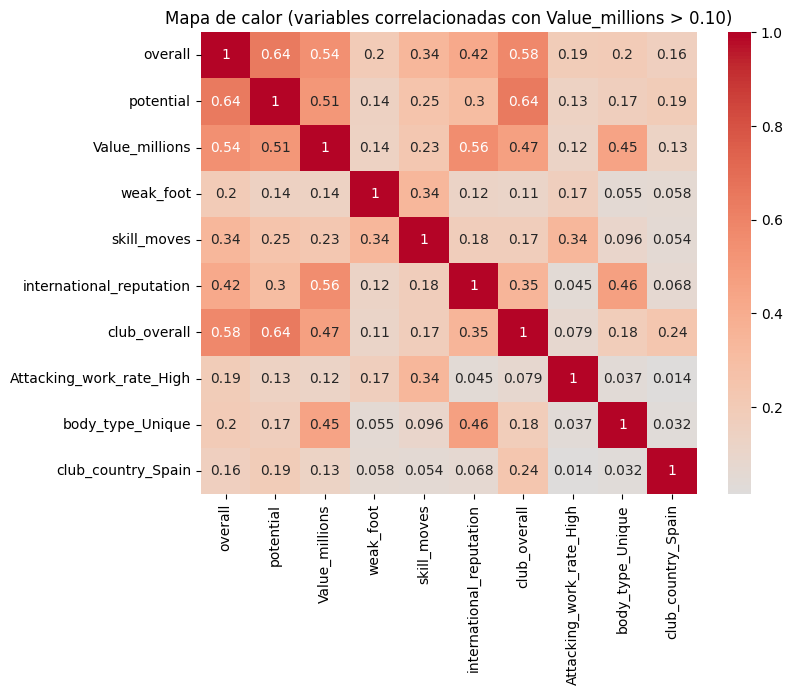

In [ ]:
# --- Calcular correlación ---
corr = df.corr(numeric_only=True)  # matriz de correlaciones

# --- Filtrar variables con correlación > 0.10 con la target ---
target_corr = corr["Value_millions"]
variables_filtradas = target_corr[abs(target_corr) > 0.10].index  # abs() para que considere positivas y negativas

# --- Crear sub-matriz solo con esas variables ---
corr_filtrado = corr.loc[variables_filtradas, variables_filtradas]

# --- Graficar heatmap ---
plt.figure(figsize=(8,6))
sns.heatmap(corr_filtrado, annot=True, cmap="coolwarm", center=0)
plt.title("Mapa de calor (variables correlacionadas con Value_millions > 0.10)")
plt.show()


Encontramos 9 variables que se correlacionan con al menos un 0.10 respecto a la variable Target.

Veamos ordenadamente las variables correlacionadas

In [ ]:
df.corr()[(df.corr()['Value_millions'] > 0.10)]['Value_millions'].sort_values(ascending=False)

,Value_millions
Value_millions,1.000000
international_reputation,0.555256
overall,0.543204
potential,0.512392
club_overall,0.467281
body_type_Unique,0.451909
skill_moves,0.230581
weak_foot,0.140975
club_country_Spain,0.126255
Attacking_work_rate_High,0.121191


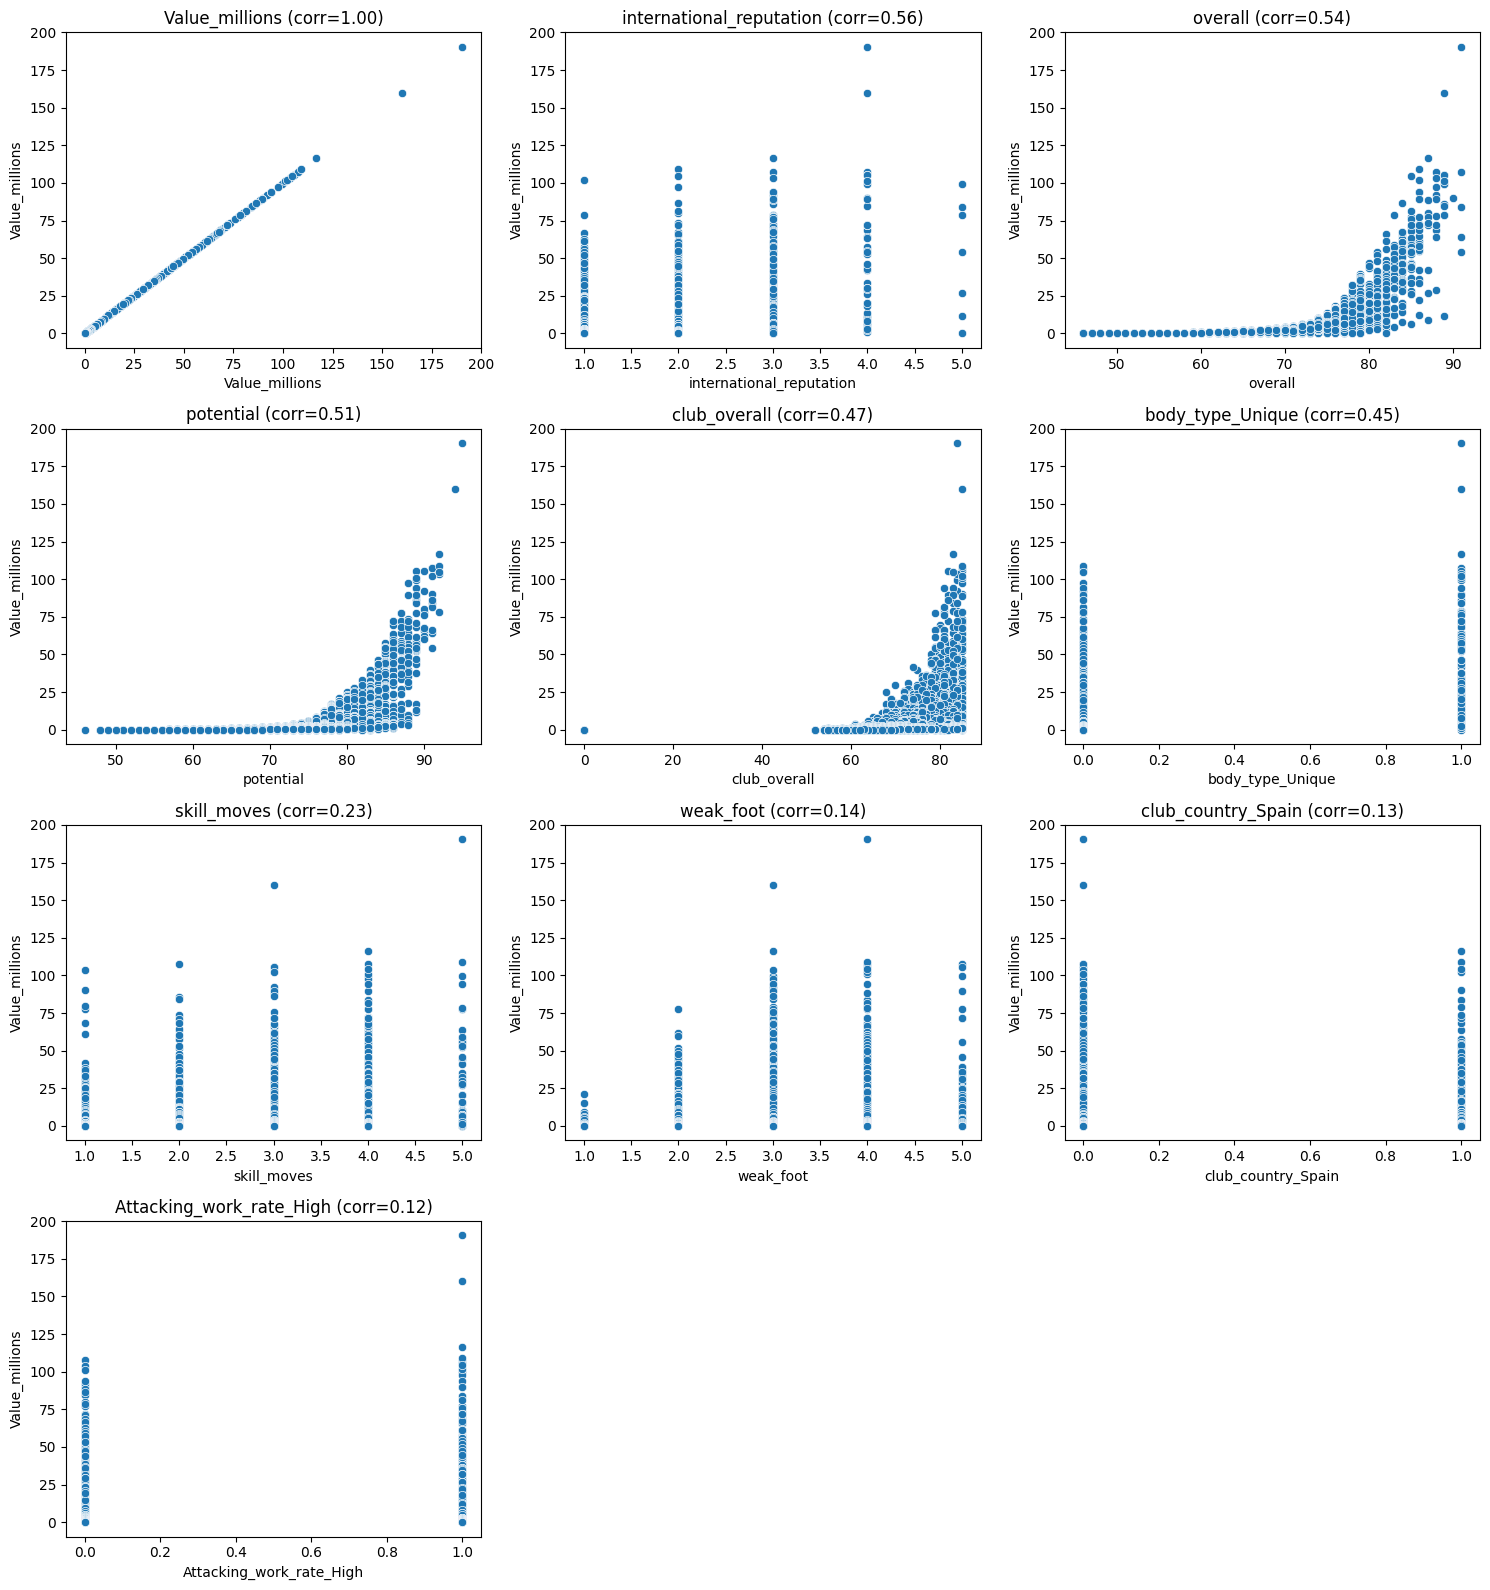

In [ ]:
import math

# --- Ordenar las variables por correlación absoluta ---
variables_ordenadas = target_corr[variables_filtradas].abs().sort_values(ascending=False).index

# --- Definir número de filas y columnas ---
n = len(variables_ordenadas)
cols = 3  # número de columnas en la rejilla
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()  # convertir a lista plana de ejes

# --- Graficar ---
for i, var in enumerate(variables_ordenadas):
    sns.scatterplot(x=df[var], y=df["Value_millions"], ax=axes[i])
    axes[i].set_title(f"{var} (corr={target_corr[var]:.2f})")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Value_millions")

# Eliminar ejes vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<Axes: xlabel='age', ylabel='Value_millions'>

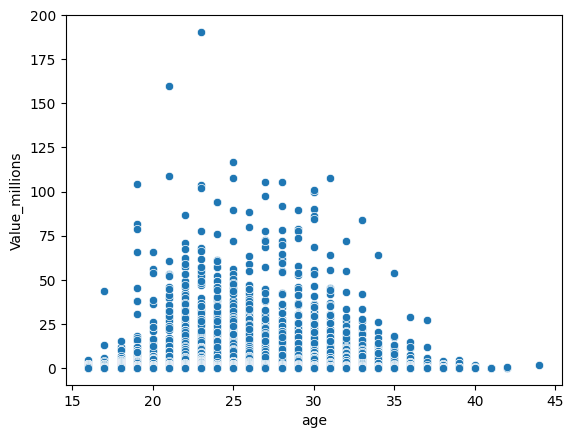

In [ ]:
sns.scatterplot(x=df['age'], y=df["Value_millions"])

<Axes: xlabel='age', ylabel='Count'>

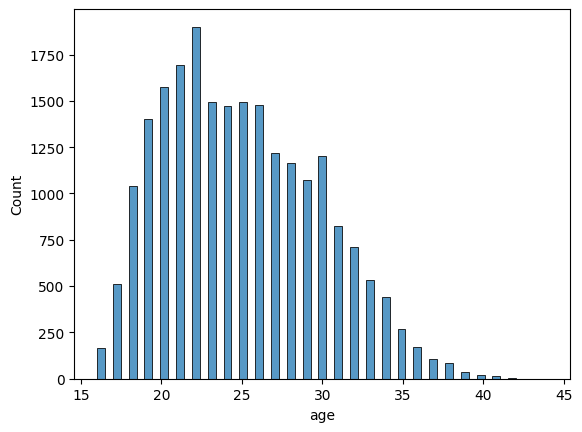

In [ ]:
sns.histplot(df['age'])

**Respuesta a preguntas**:

1. Las 3 variables con más correlación son: Overall, international_reputation y potential .

2. La relación presente entre las variables de valor y de edad no se observa similar a una linea recta, por el contrario parece mostrar una leve normalidad que está relacionada con la distribución de la variable age en sí.

3. En los gráficos de dispersión encontrados, ninguno de los vistos parece tener una relación lineal casi perfecta. Este resultado es algo esperado ya que el precio de un jugador de futbol suele relacionarse con muchisimos aspectos distintos.

### **Ejercicio 2: Regresión Lineal Simple y Verificación de Supuestos**

Ahora construiremos nuestro primer modelo predictivo utilizando solo la mejor variable predictora que encontramos.

**Tareas:**

1.  **Construir el Modelo:**
    * Selecciona la variable predictora que tuvo la correlación más alta con `Value_millions` en el ejercicio anterior (probablemente `overall` o `potential`).
    * Divide tus datos en un conjunto de entrenamiento (70%) y un conjunto de prueba (30%).
    * Entrena un modelo de Regresión Lineal Simple usando solo esta variable para predecir `Value_millions`.

2.  **Interpretar y Evaluar:**
    * Obtén e interpreta el intercepto ($\theta_0$) y el coeficiente ($\theta_1$) del modelo.
    * Calcula el coeficiente de determinación (R²) en el conjunto de prueba.

3.  **Verificar los Supuestos Teóricos:**
    * Calcula los **residuos** del modelo en el conjunto de prueba (valor real - valor predicho).
    * **Normalidad:** Crea un histograma de los residuos. ¿Siguen una distribución normal (forma de campana)?
    * **Homocedasticidad:** Crea un gráfico de dispersión con los valores predichos en el eje X y los residuos en el eje Y.

**Preguntas para Reflexión y Discusión:**

* **Pregunta 2.1:** Explica con tus propias palabras qué significa el coeficiente $\theta_1$ que obtuviste. Por ejemplo: "Por cada punto que aumenta [tu variable], el valor de mercado del jugador aumenta/disminuye en X millones de dólares".
* **Pregunta 2.2:** ¿Qué te dice el valor de R² sobre qué tan bien tu modelo de una sola variable puede explicar la variación en el valor de mercado de los jugadores?
* **Pregunta 2.3:** Observando el gráfico de residuos vs. valores predichos, ¿los puntos forman una nube aleatoria sin patrón alrededor de la línea cero, o ves alguna forma (como un cono o un embudo)? ¿Qué te dice esto sobre el supuesto de homocedasticidad?

---

**T1**

Empecemos ahora a entrenar el modelo lineal simple con Scikit Learn

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[['overall']], df['Value_millions'], test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

**T2**

Revisemos los $\theta$ del modelo.

In [ ]:
print(f'Intercepto: {model.intercept_}')
print(f'Coeficiente: {model.coef_[0]}')

Intercepto: -33.69723158086994
Coeficiente: 0.555476536745


Ahora el desempeño con R2:

In [ ]:
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print('R2: ',r2)

R2:  0.2850501977394486


T3

Veamos la suma de residuos:

In [ ]:
residuos = y_test - y_pred
print(f' suma de residuos de la regresión {residuos.sum()}')

 suma de residuos de la regresión -708.3347050197564


El histograma de residuos.

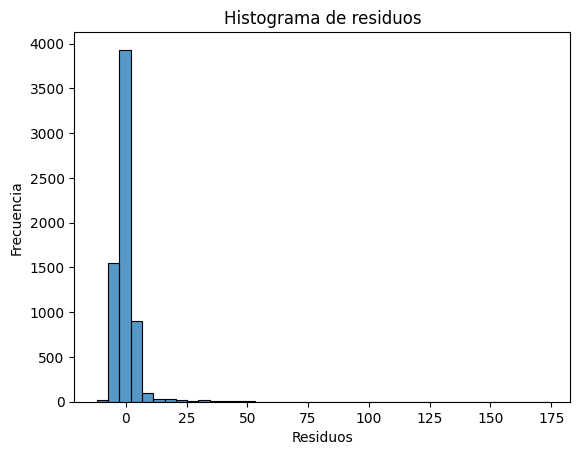

In [ ]:
plt.figure()
sns.histplot(residuos, bins= 40)
plt.ylabel('Frecuencia')
plt.xlabel('Residuos')
plt.title('Histograma de residuos')
plt.show()

Finalmente la disperción de los residuos respecto a la variable predictora.

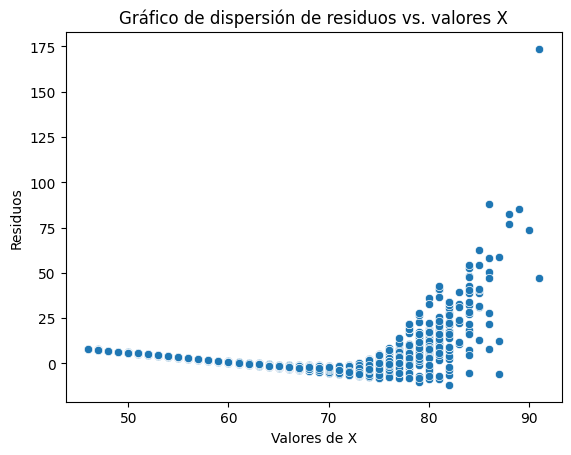

In [ ]:
sns.scatterplot(x= x_test['overall'], y= residuos)
plt.xlabel('Valores de X')
plt.ylabel('Residuos')
plt.title('Gráfico de dispersión de residuos vs. valores X')
plt.show()

Resolvamos las preguntas:

1. El significado de $\theta_1$ o el coeficiente 1 representa el cambio que genera cada unidad del puntaje de desempeño del jugador en el valor final que va a tener en su predicción.
2. De acuerdo con el R2, el modelo explica sólamente el 28% de la variabilidad de los datos. Por lo tanto es posible concluir que esta variable (al menos en su forma original) no es suficiente para predecir el valor de un jugador.
3. En el gráfico de residuos vs $X$ encontramos una forma de embudo. Esto nos indica que no se cumple el supuesto de homocedasticidad y es posible que se deba usar otro modelo distino al lineal para poder capturar el comportamiento de los datos.

### **Ejercicio 3: Regresión Lineal Múltiple 🏙️**

Un solo atributo no es suficiente para determinar el valor de un jugador. Usemos múltiples variables para crear un modelo más robusto.

**Tareas:**

1.  **Construir el Modelo Múltiple:**
    * Selecciona un conjunto de 4 a 6 de las variables predictoras numéricas más prometedoras (ej. `overall`, `potential`, `age`, `international_reputation`, `skill_moves`, etc.).
    * Entrena un nuevo modelo de Regresión Lineal Múltiple utilizando todas estas variables para predecir `Value_millions`. Asegúrate de usar los mismos conjuntos de entrenamiento y prueba.

2.  **Interpretar y Evaluar:**
    * Obtén e imprime los coeficientes para cada una de las variables.
    * Calcula el nuevo R² del modelo múltiple.

**Preguntas para Reflexión y Discusión:**

* **Pregunta 3.1:** Compara el R² del modelo múltiple con el del modelo simple. ¿Mejoró significativamente el modelo al añadir más información?
* **Pregunta 3.2:** Observa el coeficiente de la variable `age`. ¿Es positivo o negativo? ¿Qué te dice esto sobre cómo cambia el valor de un jugador con la edad, *manteniendo constantes todos los demás factores como su `overall` y `potential`*?
* **Pregunta 3.3:** ¿Es posible que una variable que parecía importante en el análisis de correlación inicial tenga un coeficiente pequeño o inesperado en el modelo múltiple? ¿Por qué podría ocurrir esto?

---


Para realizar este modelo de regresión múltiple seleccionaremos las variables más correlacionadas dentro de nuestro analisis del mapa de Calor: international_reputation, overall, potential, club_overall, body_type y Skill moves.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[['international_reputation', 'overall', 'potential', 'club_overall', 'body_type_Unique', 'skill_moves']], df['Value_millions'], test_size=0.3, random_state=42)

Entrenemos el modelo.

In [ ]:
model_multiple = LinearRegression()
model_multiple.fit(x_train, y_train)

LinearRegression()

Finalmente generemos los coeficientes y el r2 del modelo.

In [ ]:
print(f'Intercepto: {model_multiple.intercept_}')
print(f'Coeficientes: {model_multiple.coef_}')
print(f'columnas: {x_train.columns}')

Intercepto: -40.37316986889679
Coeficientes: [ 5.9028191   0.19325213  0.23959234  0.09361887 19.93577654  0.23063682]
columnas: Index(['international_reputation', 'overall', 'potential', 'club_overall',
       'body_type_Unique', 'skill_moves'],
      dtype='object')


In [ ]:
y_pred = model_multiple.predict(x_test)
r2 = r2_score(y_test, y_pred)
print('R2: ',r2)

R2:  0.48568298549826283


Para poder dar respuesta a las preguntas presentes en este cuaderno, realizaremos nuevamente el proceso de entrenamiento con la variable de age.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[['international_reputation', 'overall', 'potential', 'club_overall', 'body_type_Unique', 'skill_moves', 'age']], df['Value_millions'], test_size=0.3, random_state=42)

In [ ]:
model_multiple = LinearRegression()
model_multiple.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(f'Intercepto: {model_multiple.intercept_}')
print(f'Coeficientes: {model_multiple.coef_}')
print(f'columnas: {x_train.columns}')

Intercepto: -28.080348424150458
Coeficientes: [ 6.59100904  0.52489458 -0.08967447  0.0922864  18.96976763  0.03267873
 -0.4379194 ]
columnas: Index(['international_reputation', 'overall', 'potential', 'club_overall',
       'body_type_Unique', 'skill_moves', 'age'],
      dtype='object')


In [ ]:
y_pred = model_multiple.predict(x_test)
r2 = r2_score(y_test, y_pred)
print('R2: ',r2)

R2:  0.5115932980567501


Con la información generada, respondamos las preguntas:
- 3.1: Si, el modelo de regresión mejoró de forma significativa. Sin embargo aún sigue siendo deficiente para predecir el valor de un jugador; es posible que sea necesario realizar un trabajo de feature Engineer para lograr mejores resultados, pues en el punto pasado encontramos que los residuos no estaban distribuidos aleatoriamente.
- 3.2: Podemos observar que la variable age tiene un coeficiente negativo, exactamente de -0,437; lo que nos indica que existe una correlación inversa, donde por cada año adicional, un jugador pierde 0.437 millones en valor.
- 3.3: Si, es posible y sucedió en este entrenamiento, especificamente con potencial, esto probablemente se debe a la multicolinealidad que tenga esta variable con overall. Adicionalmente resulta curioso verificar que aunque edad no tenga una correlación significante en la matriz de correlación, en la realidad, siendo mezclada con otras variables puede ser significativa. Tal vez también se deba a que no tenga multicolinealidad con otras.

### **Ejercicio 4: Regresión Lineal Polinomial 🎢**

Recordemos la relación entre `age` y `Value_millions`. No era lineal. Vamos a intentar capturar esa curva.

**Tareas:**

1.  **Construir el Modelo Polinomial:**
    * Enfócate nuevamente en predecir `Value_millions` usando únicamente la variable `age`.
    * Crea un modelo de Regresión Polinomial de **grado 2**. Esto significa que usarás `age` y `age²` como tus características. (Sugerencia: usa `PolynomialFeatures` de Scikit-Learn dentro de un `Pipeline`).
    * Entrena el modelo.

2.  **Visualizar y Evaluar:**
    * Crea un gráfico de dispersión de `age` vs. `Value_millions`.
    * Superpón en el mismo gráfico la curva de tu modelo polinomial ajustado.
    * Compara el R² de este modelo con el R² del modelo de regresión simple que usaba solo `age`.

**Preguntas para Reflexión y Discusión:**

* **Pregunta 4.1:** Viendo el gráfico, ¿el modelo polinomial de grado 2 captura mejor la relación entre la edad y el valor de mercado que una simple línea recta?
* **Pregunta 4.2 (Reto):** Intenta construir un modelo polinomial de grado muy alto (ej. grado 10) usando `age`. ¿Qué le pasa a la curva? Explica con tus palabras por qué este modelo, aunque se ajuste muy bien a los datos de entrenamiento, es un mal modelo. ¿Cómo se llama este fenómeno?

Iniciemos con la construcción del modelo polinomial relacionado a la variable age:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[['age']], df['Value_millions'], test_size=0.3, random_state=42)

In [ ]:
poly_model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("linear_regression", LinearRegression())
])
poly_model

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('linear_regression', LinearRegression())])

In [ ]:
poly_model.fit(x_train, y_train)
y_pred = poly_model.predict(x_test)

r2 = r2_score(y_test, poly_model.predict(x_test))
print("R²:", r2)

R²: 0.012810443544506


Obtenemos un R2 bastante pobre pues Age no es un buen predictor para Value_milliones (Al menos usandolo como única variable).

Ahora grafiquemos la disperción cómo nos indica el punto.

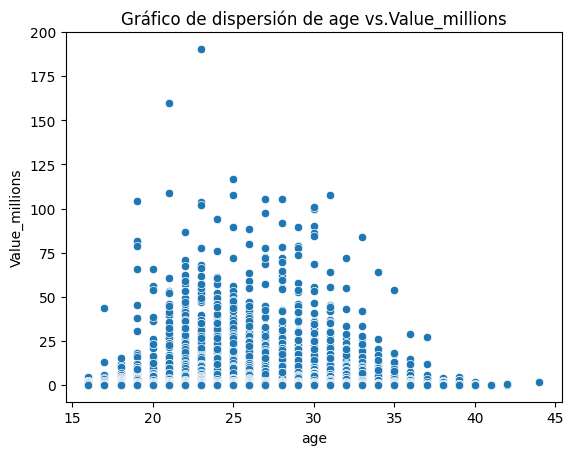

In [ ]:
sns.scatterplot(x=df['age'], y= df['Value_millions'])
plt.title('Gráfico de dispersión de age vs.Value_millions')
plt.show()

Finalmente ajustemos el modelo al gráfico de dispersión.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


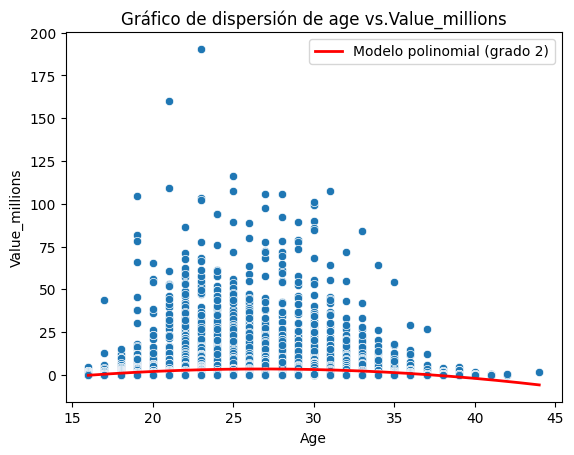

In [ ]:
sns.scatterplot(x=df['age'], y= df['Value_millions'])
plt.title('Gráfico de dispersión de age vs.Value_millions')

# Crear un rango ordenado de edades (para que la línea sea continua)
X_range = np.linspace(df['age'].min(), df['age'].max(), 200).reshape(-1, 1)

# Predecir con el modelo polinomial
y_range_pred = poly_model.predict(X_range)

# Dibujar la línea del modelo
plt.plot(X_range, y_range_pred, color="red", linewidth=2, label="Modelo polinomial (grado 2)")

plt.xlabel("Age")
plt.ylabel("Value_millions")
plt.legend()
plt.show()

Respuesta a 4.1: Si, el modelo pudo capturar ligeramente mejor la relación, sin embargo, sigue siendo insuficiente para obtener buenos resultados. Para mejorar esto, más adelante realicemos un modelo de regresión lineal polinómica que emplee las características que en el punto anterior consideramos como las más relevantes.

Por ahora pasemos a la pregunta 4.2 (Reto). Para mejorar el criterio de los modelos usemos standardScaler

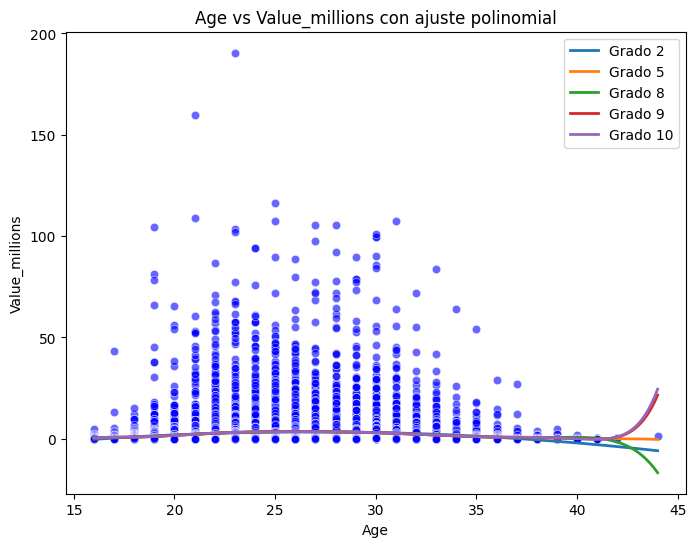

   Grado      RMSE        R2
0      2  6.238475  0.010747
1      5  6.238461  0.010752
2      8  6.242678  0.009414
3      9  6.242081  0.009604
4     10  6.244349  0.008884


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
# 🔹 Definir variables
X = df[['age']].values
y = df['Value_millions'].values

# Dividir train/test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Guardar resultados
resultados = []

# Gráfica base de dispersión
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['age'], y=df['Value_millions'], color="blue", alpha=0.6)

# Crear rango continuo de edades (para graficar la curva)
X_range = np.linspace(df['age'].min(), df['age'].max(), 200).reshape(-1, 1)

# Probar grados especificados
grados = [2,5,8,9,10]
for degree in grados:
    # Pipeline
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
        ("scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

    # Entrenamiento
    model.fit(x_train, y_train)

    # Predicciones test
    y_pred = model.predict(x_test)

    # Métricas
    rmse = mean_squared_error(y_test, y_pred)**0.5
    r2 = r2_score(y_test, y_pred)
    resultados.append({"Grado": degree, "RMSE": rmse, "R2": r2})

    # 🔹 Predicción en rango continuo (para la curva)
    y_range_pred = model.predict(X_range)

    # Dibujar curva del modelo
    plt.plot(X_range, y_range_pred, linewidth=2, label=f"Grado {degree}")

# Decoración de la gráfica
plt.title("Age vs Value_millions con ajuste polinomial")
plt.xlabel("Age")
plt.ylabel("Value_millions")
plt.legend()
plt.show()

# 🔹 Mostrar resultados en tabla
df_resultados = pd.DataFrame(resultados)
print(df_resultados)

Encontramos en los datos un ajuste similar, exceptuando la parte final. Por la característica del comportamiento de la variable age respecto a la Target, es dificil que algun modelo, independientemente de su grado ajuste correctamente.

Pasemos ahora a la expermientación para construir un modelo que realmente sea bueno prediciendo el valor de los jugadores.

In [ ]:
#Definir variables para el modelo
x_train, x_test, y_train, y_test = train_test_split(df[['international_reputation', 'overall', 'potential', 'club_overall', 'body_type_Unique', 'skill_moves', 'age']], df['Value_millions'], test_size=0.3, random_state=42)

In [ ]:
resultados = []

# Probar grados especificados
grados = [2,3,4,5]
for degree in grados:
    # Pipeline
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
        ("scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

    # Entrenamiento
    model.fit(x_train, y_train)

    # Predicciones test
    y_pred = model.predict(x_test)

    # Métricas
    rmse = mean_squared_error(y_test, y_pred)**0.5
    r2 = r2_score(y_test, y_pred)
    resultados.append({"Grado": degree, "RMSE": rmse, "R2": r2})

# 🔹 Mostrar resultados en tabla
df_resultados = pd.DataFrame(resultados)
print(df_resultados)

   Grado       RMSE        R2
0      2   2.502708  0.859510
1      3   1.406724  0.955614
2      4   5.285379  0.373420
3      5  14.967287 -4.024704


Observamos resultados bastante buenos para la regresión polinómica con grado 2 y 3. Sin embargo, repitamos este experimento usando cross validation (Pues sólo se usó 1 conjunto de prueba).

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
X = df[['international_reputation', 'overall', 'potential', 'club_overall', 'body_type_Unique', 'skill_moves', 'age']]
y = df['Value_millions']

# Configuración de la validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Métricas personalizadas
rmse_scorer = make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred) ** 0.5, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

resultados = []
grados = [2, 3, 4, 5]

for degree in grados:
    # Pipeline polinómico
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
        ("scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

    # Cross validation
    rmse_scores = cross_val_score(model, X, y, cv=cv, scoring=rmse_scorer)
    r2_scores = cross_val_score(model, X, y, cv=cv, scoring=r2_scorer)

    resultados.append({
        "Grado": degree,
        "RMSE_promedio": -np.mean(rmse_scores),  # signo negativo porque scikit-learn lo invierte
        "R2_promedio": np.mean(r2_scores)
    })

# Mostrar resultados
df_resultados = pd.DataFrame(resultados)
print(df_resultados)

   Grado  RMSE_promedio  R2_promedio
0      2       2.553432     0.860873
1      3       1.326001     0.961823
2      4       2.966482     0.797435
3      5       9.675789    -1.253751


Observamos que usando cross validation para asegurarnos de la confiabilidad; observamos que hasta el grado 4 obtenemos un R^2 obtenemos resultados aceptables (Siendo el grado 3 el que mejor desempeño tiene). Este resultado van muy en línea con respecto a lo que nos dice la teoría: Entre mayor sea el grado polinómico empleado, hay un mayor riesgo de sobreajuste, que en este caso inició en el grado 4 pero se maximizó desde el grado 5 (Donde las predicciones fueron tan malas que hasta el R^2 nos dió negativo).